In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.optimize import curve_fit
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 

In [75]:
plan=pd.read_csv('planejamento_3_sabugo.csv')
print(plan.head())

     r             m             v           s          Y
0 -1.0 -9.999999e-01 -9.999999e-01  156.472416  95.797405
1 -1.0 -9.999999e-01  1.000000e-07  156.399340  95.752665
2 -1.0 -9.999999e-01  1.000000e+00  158.236542  96.877459
3 -1.0  1.000000e-07 -9.999999e-01  156.471850  95.797058
4 -1.0  1.000000e-07  1.000000e-07  155.374445  95.125192


<Figure size 432x288 with 0 Axes>

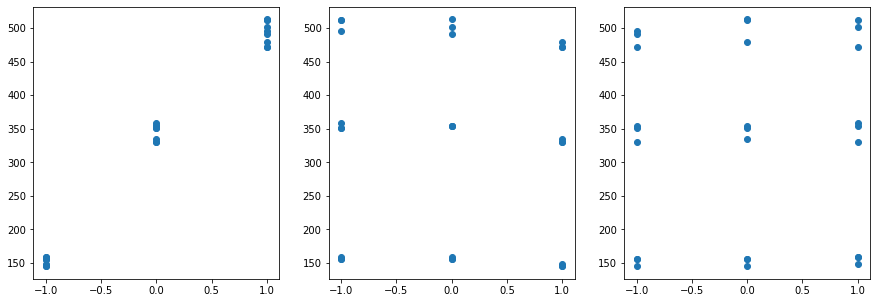

In [76]:
x1=plan['r']
x2=plan['m']
x3=plan['v']
y=plan['s']

fig = plt.figure()
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5), sharey=False)

ax1.scatter(x1, y, color='tab:blue')
ax2.scatter(x2, y, color='tab:blue')
ax3.scatter(x3, y, color='tab:blue')

plt.show()

In [77]:
#regressão
formula='s ~ r+m+v+I(r**2.0)+I(m**2.0)+I(v**2.0)+I(r*m)+I(r*v)+I(m*v)'
est = smf.ols(formula, data=plan).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      s   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     2981.
Date:                Sat, 16 Nov 2019   Prob (F-statistic):           2.24e-25
Time:                        21:44:48   Log-Likelihood:                -72.354
No. Observations:                  27   AIC:                             164.7
Df Residuals:                      17   BIC:                             177.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     354.6388      2.264    156.632      

In [78]:
pred_val = est.fittedvalues.copy()
true_val = plan['s'].values.copy()
residual = true_val - pred_val

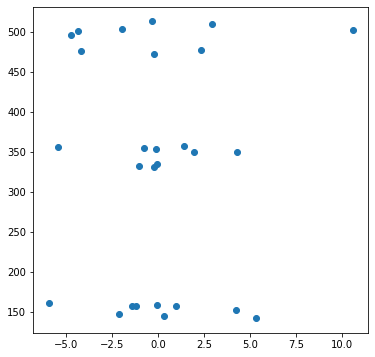

In [79]:
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(residual, pred_val)

In [80]:
formula='s ~ r+m+v+I(r**2.0)+I(m**2.0)+I(r*m)'
est = smf.ols(formula, data=plan).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      s   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     3720.
Date:                Sat, 16 Nov 2019   Prob (F-statistic):           2.18e-29
Time:                        21:44:48   Log-Likelihood:                -77.030
No. Observations:                  27   AIC:                             168.1
Df Residuals:                      20   BIC:                             177.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     352.5871      2.098    168.079      

In [81]:
formula='s ~ r'
est = smf.ols(formula, data=plan).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      s   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     1970.
Date:                Sat, 16 Nov 2019   Prob (F-statistic):           2.66e-25
Time:                        21:44:48   Log-Likelihood:                -112.65
No. Observations:                  27   AIC:                             229.3
Df Residuals:                      25   BIC:                             231.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    331.4785      3.139    105.601      0.0

In [82]:
# separa os dados em treino e teste
train=plan.sample(frac=0.80,random_state=6) # poderia ser frac=0.5? sim ou nao?
test=plan.drop(train.index)

In [83]:
x_train=train[['r','m','v']]
x_test=test[['r','m','v']]
y_train=train[['s']]
y_test=test[['s']]

In [84]:
# define a rede neural Y
clf_Y = MLPRegressor(solver='lbfgs',activation='tanh',alpha=1e-5,hidden_layer_sizes=(6),random_state=3)

In [85]:
# treina a rede neural Y
clf_Y.fit(x_train, y_train)

C:\Users\thais\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='tanh', alpha=1e-05, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=6, learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=3, shuffle=True, solver='lbfgs', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [86]:
# usa a rede neural treina em calculos para treino e teste Y
y_calc_train=clf_Y.predict(x_train)
y_calc_test=clf_Y.predict(x_test)

In [88]:
print(y_test)
print('================')
print(pd.DataFrame(y_calc_test))

             s
3   156.471850
9   351.193815
10  351.133870
20  512.637949
26  472.030551
            0
0  151.098428
1  359.358920
2  361.650445
3  502.164978
4  491.349282


In [89]:
mse=mean_squared_error(y_test,y_calc_test)
print("MSE teste=",mse)
R2=r2_score(y_test,y_calc_test)
print("R^2 teste=",R2)

MSE teste= 137.8074954616507
R^2 teste= 0.9910574028282705
